# Text Computational Analysis for *Dubliners*

## Zhuoyi Zou

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
2. Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
3. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (`.ipynb`) will be the only thing you turn in.  
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with `#`), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters? 
3. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable. 
4. Proofread well! If English is not your first language, you might consider making an appointment with [the Writing Center](https://slc.berkeley.edu/appointment-service) to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like [Grammerly](https://www.grammarly.com/). (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
4. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
4. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use [MLA Style](https://style.mla.org/) as the format for your bibliography, and title it "works cited." 
4. Replace the value of the `filename` variable in the wordcount cell below to the name your file. (E.g., `Jonathan-Final.ipynb`.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.  
5. Optionally, and for a 5% bonus, add your notebook to the `/Projects` directory of the course repository, and submit it as a pull request. Your project will then become public. 
6. Email me your `.ipynb` file: jonathan.reeve@columbia.edu. Please email me only your `.ipynb` file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: `Yourname: Final Project`, replacing `yourname` with your name. Do this regardless of whether you also submit a pull request. 
7. Celebrate! You've finished your final project, and gloriously completed _Introduction to Computational Literary Analysis_!

In [8]:
# Import all your libraries here, and only here, please.
from nltk import word_tokenize, sent_tokenize, pos_tag, pos_tag_sents, ngrams, Text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from more_itertools import chunked
from textblob import TextBlob
import numpy as np
import pandas as pd
import spacy
from collections import Counter
from string import punctuation
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 5]
# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

## Introduction

The following text computational analysis was based on James Joyce's *Dubliners*, the analysis was from the literature evaluation perspectives. The corpus Dubliners contains 15 short stories about the middle class residential lives in Dublin, Ireland in the early 20th century. The corpus contains 80583 English vocabularies. The 15 stories in *Dubliners* were arranged by the order of the age of the main characters of the stories. 

The goals of this text computational analysis were detecting the writing patterns of *Dubliners*, exploring the Parts of Speech distributions in *Dubliners*, parsing the similarities in 15 stories by groups, giving hypothesis based on finding and testing them. 

This text computational analysis used pos_tag function from nltk module to parse the Parts of Speech in *Dubliners*; used chunk.root.text function from Spacy module to find the noun roots; used TfidfVectorizer function and PCA function from sklearn module to construct a Principle Component Analysis model; used LatentDirichletAllocation function from sklearn module to construct a Topics model; and used dispersion_plot function from nltk module to visualize the occurrence of the vocabularies; used sentiment function in nltk to visualize the sentiment changed in plots. 

There are five parts in this text computational analysis. The first part is "General Exploration of *Dubliners*," there are steps to show how to use word_tokenize( ) and sent_tokenize( ) to get the average number of words in each sentence in each story; there are steps to show how to pos_tag( ) to get the distributions for each class of the Parts of Speech. The second part is "Selecting Feature Words," there are steps to show how to choose the feature words for constructing a Principle Component Analysis model. The third part is "PCA," which used the feature words that were selected from the second part and plotted the first two principle component scores to visualize the similarities of the stories. The fourth part is "Topic Model," indicated the use of the LatentDirichletAllocation function to find a topics model. The fifth part is "Futher Hypothesis and Test," given the hypothesises and tested them.

## General Exploration of *Dubliners*

In [4]:
### Open the Dubliners Corpus.
dubliners = open("dubliners-Copy1.md").read()

### Splitting the stories from the corpus.
dublinersParts = dubliners.split("##")

### The list of title for each story.
TextLabels = ["The Sister", "An Encounter", "Araby", "Eveline", "After the Race", "Two Gallants", "The Boarding House",
             "A Little Cloud", "Counterparts", "Clay", "A Painful Case", "Ivy Day in the Committee Room", "A Mother",
             "Grace", "The Dead"]

### Apply word_tokenize() to each story in Dubliners.
word_length = [len(word_tokenize(text.lower())) for text in dublinersParts]

### Apply sent_tokenize() to each story in Dubliners.
sent_length = [len(sent_tokenize(text)) for text in dublinersParts]

### Assigning a function to get the average number of words in each sentence. 
def averageSentLen(text): 
    sentLengths = [len(word_tokenize(sent.lower())) for sent in sent_tokenize(text)]
    return sum(sentLengths)/len(sent_tokenize(text))

avg_word_per_sent = [averageSentLen(text) for text in dublinersParts]

In [5]:
### Use the pos_tag() to find the POS
dublinersPOS = [pos_tag(word_tokenize(text.lower()))for text in dublinersParts]

def getPOS(textPOS): 
    pos = [pair[1] for pair in textPOS]
    return Counter(pos)
get_dublinersPOS = [getPOS(text) for text in dublinersPOS]

### Construct a dataframe to store the information of POS
POS = pd.DataFrame(get_dublinersPOS[1:], index = TextLabels).fillna(0).T
POS = pd.DataFrame([POS["The Sister"]/word_length[1], POS["An Encounter"]/word_length[2], POS["Araby"]/word_length[3], 
                    POS["Eveline"]/word_length[4], POS["After the Race"]/word_length[5], POS["Two Gallants"]/word_length[6],
                    POS["The Boarding House"]/word_length[7], POS["A Little Cloud"]/word_length[8], POS["Counterparts"]/word_length[9],
                    POS["Clay"]/word_length[10], POS["A Painful Case"]/word_length[11], POS["Ivy Day in the Committee Room"]/word_length[12],
                    POS["A Mother"]/word_length[13], POS["Grace"]/word_length[14], POS["The Dead"]/word_length[15]])

POS["VB SUM"] = POS["VB"] + POS["VBD"] + POS["VBG"] + POS["VBN"] + POS["VBP"] + POS["VBZ"]
POS["JJ SUM"] = POS["JJ"] + POS["JJR"] + POS["JJS"]
POS["PRP SUM"] = POS["PRP"] + POS["PRP$"]
POS["NN SUM"] = POS["NN"] + POS["NNS"] + POS["NNP"]
POS["RB SUM"] = POS["RB"] + POS["RBR"] + POS["RBS"] + POS["RP"]

Text(0,0.5,'Percentage Occurrence')

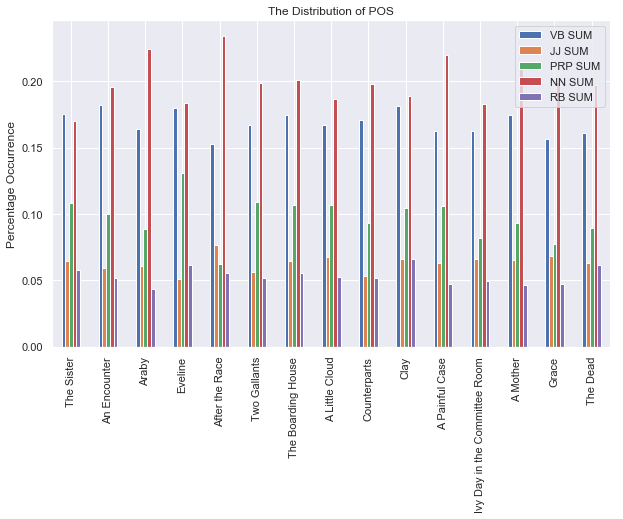

In [9]:
avg_len = pd.Series(avg_word_per_sent[1:],index = TextLabels)

### Use bar plot to visualize the average number of words per sentence in each story 
#plt.subplot()
#avg_len.plot(kind = "bar")
#plt.title("Average number of words per sentence")
#plt.ylabel("Words per Sentence")

### Use bar plot to visualize the distributions of POS in each story
POS[["VB SUM", "JJ SUM", "PRP SUM", "NN SUM", "RB SUM"]].plot(kind = "bar")
plt.title("The Distribution of POS")
plt.ylabel("Percentage Occurrence")

The plot of the distributions of POS, showed that the distribution of POS in each story was roughly identical. This indicated that the author had a constant writing style when he created this work. The noun appeared most frequently in every story except "The Sister";  "The Sister" contained more verb compared to the noun. The adjective vocabularies did not appear frequently in stories. This result was quite surprised me, I didn't expect that the proportion of adjective vocabularies was roughly 6% in each story. The lack of the adjective vocabularies indicated that the author preferred describing events rustically or intentionally preferred neutral-toned.

### Hypothesis: Using 40 vocabularies and applying them into a PCA model, the first two principle components plot could provide me some information about the similarities of the content of the stories.  

The reasons that I came up with this hypothesis: 
There is a setting "max_feature = " in constructing a PCA model, it selects the most frequent words in the corpus. Even though, it selects the most frequent words in the corpus but it does not consider the unbalance occurrence of the vocabularies in each story. For example, there is a word that appears a lot of times in a specific story but it never appears in another stories, there would be a lot of missing values in the consideration of constructing a model, that provides us a lot of uncertainty of the model which means that we will have a big prediction variation. Thus I wanted to try manually selecting the feature words to construct a PCA model and attempted to find some links between the stories from the feature words.

### Selecting 40 Feature Words

In [10]:
nlp = spacy.load('en_core_web_lg')

/Users/cherrycherry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/cherrycherry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [11]:
doc = [nlp(text) for text in dublinersParts[1:]]

In [10]:
root_1 =[chunk.root.text for chunk in doc[0].noun_chunks]
root_2 =[chunk.root.text for chunk in doc[1].noun_chunks]
root_3 =[chunk.root.text for chunk in doc[2].noun_chunks]
root_4 =[chunk.root.text for chunk in doc[3].noun_chunks]
root_5 =[chunk.root.text for chunk in doc[4].noun_chunks]
root_6 =[chunk.root.text for chunk in doc[5].noun_chunks]
root_7 =[chunk.root.text for chunk in doc[6].noun_chunks]
root_8 =[chunk.root.text for chunk in doc[7].noun_chunks]
root_9 =[chunk.root.text for chunk in doc[8].noun_chunks]
root_10 =[chunk.root.text for chunk in doc[9].noun_chunks]
root_11 =[chunk.root.text for chunk in doc[10].noun_chunks]
root_12 =[chunk.root.text for chunk in doc[11].noun_chunks]
root_13 =[chunk.root.text for chunk in doc[12].noun_chunks]
root_14 =[chunk.root.text for chunk in doc[13].noun_chunks]
root_15 =[chunk.root.text for chunk in doc[14].noun_chunks]

noun_table = pd.DataFrame([Counter(root_1).most_common(50), Counter(root_2).most_common(50), Counter(root_3).most_common(50),
             Counter(root_4).most_common(50), Counter(root_5).most_common(50), Counter(root_6).most_common(50),
             Counter(root_7).most_common(50), Counter(root_8).most_common(50), Counter(root_9).most_common(50),
             Counter(root_10).most_common(50), Counter(root_11).most_common(50), Counter(root_12).most_common(50),
             Counter(root_13).most_common(50), Counter(root_14).most_common(50), Counter(root_15).most_common(50)], 
            index = TextLabels).T

In [11]:
def getVBD(taggedText):
    VBD = []
    for pair in taggedText:
        word = pair[0]
        pos = pair[1]
        if pos == "VB" or pos == "VBD" or pos == "VBG" or pos == "VBN" or pos == "VBP" or pos == "VBZ":
            VBD.append(word)
    return VBD
root_1 = getVBD(pos_tag(word_tokenize(dublinersParts[1].lower())))
root_2 = getVBD(pos_tag(word_tokenize(dublinersParts[2].lower())))
root_3 = getVBD(pos_tag(word_tokenize(dublinersParts[3].lower())))
root_4 = getVBD(pos_tag(word_tokenize(dublinersParts[4].lower())))
root_5 = getVBD(pos_tag(word_tokenize(dublinersParts[5].lower())))
root_6 = getVBD(pos_tag(word_tokenize(dublinersParts[6].lower())))
root_7 = getVBD(pos_tag(word_tokenize(dublinersParts[7].lower())))
root_8 = getVBD(pos_tag(word_tokenize(dublinersParts[8].lower())))
root_9 = getVBD(pos_tag(word_tokenize(dublinersParts[9].lower())))
root_10 = getVBD(pos_tag(word_tokenize(dublinersParts[10].lower())))
root_11 = getVBD(pos_tag(word_tokenize(dublinersParts[11].lower())))
root_12 = getVBD(pos_tag(word_tokenize(dublinersParts[12].lower())))
root_13 = getVBD(pos_tag(word_tokenize(dublinersParts[13].lower())))
root_14 = getVBD(pos_tag(word_tokenize(dublinersParts[14].lower())))
root_15 = getVBD(pos_tag(word_tokenize(dublinersParts[15].lower())))

verb_table = pd.DataFrame([Counter(root_1).most_common(20), Counter(root_2).most_common(20), Counter(root_3).most_common(20),
             Counter(root_4).most_common(20), Counter(root_5).most_common(20), Counter(root_6).most_common(20),
             Counter(root_7).most_common(20), Counter(root_8).most_common(20), Counter(root_9).most_common(20),
             Counter(root_10).most_common(20), Counter(root_11).most_common(20), Counter(root_12).most_common(20),
             Counter(root_13).most_common(20), Counter(root_14).most_common(20), Counter(root_15).most_common(20)], 
            index = TextLabels).T



In [12]:
def getJJ(taggedText):
    JJ = []
    for pair in taggedText:
        word = pair[0]
        pos = pair[1]
        if pos == "JJ" or pos == "JJR" or pos == "JJS":
            JJ.append(word)
    return JJ
root_1 = getJJ(pos_tag(word_tokenize(dublinersParts[1].lower())))
root_2 = getJJ(pos_tag(word_tokenize(dublinersParts[2].lower())))
root_3 = getJJ(pos_tag(word_tokenize(dublinersParts[3].lower())))
root_4 = getJJ(pos_tag(word_tokenize(dublinersParts[4].lower())))
root_5 = getJJ(pos_tag(word_tokenize(dublinersParts[5].lower())))
root_6 = getJJ(pos_tag(word_tokenize(dublinersParts[6].lower())))
root_7 = getJJ(pos_tag(word_tokenize(dublinersParts[7].lower())))
root_8 = getJJ(pos_tag(word_tokenize(dublinersParts[8].lower())))
root_9 = getJJ(pos_tag(word_tokenize(dublinersParts[9].lower())))
root_10 = getJJ(pos_tag(word_tokenize(dublinersParts[10].lower())))
root_11 = getJJ(pos_tag(word_tokenize(dublinersParts[11].lower())))
root_12 = getJJ(pos_tag(word_tokenize(dublinersParts[12].lower())))
root_13 = getJJ(pos_tag(word_tokenize(dublinersParts[13].lower())))
root_14 = getJJ(pos_tag(word_tokenize(dublinersParts[14].lower())))
root_15 = getJJ(pos_tag(word_tokenize(dublinersParts[15].lower())))

JJ_table = pd.DataFrame([Counter(root_1).most_common(30), Counter(root_2).most_common(30), Counter(root_3).most_common(30),
             Counter(root_4).most_common(30), Counter(root_5).most_common(30), Counter(root_6).most_common(30),
             Counter(root_7).most_common(30), Counter(root_8).most_common(30), Counter(root_9).most_common(30),
             Counter(root_10).most_common(30), Counter(root_11).most_common(30), Counter(root_12).most_common(30),
             Counter(root_13).most_common(30), Counter(root_14).most_common(30), Counter(root_15).most_common(30)], 
            index = TextLabels).T

In this part, I used chunk.root.text function to find the noun roots in each story. Using pos_tag( ) function might provide the same or similar results of finding the nouns. Then I used pos_tag( ) function to find the adjective vocabularies and verb vocabularies. I used Counter( ) function to count the frequency of the vocabularies in each category and used the most_common( ) function to sort the vocabularies in descending order and showed the first tens vocabularies. I did not want to have any missing values in my list of the feature words that would be applied to the PCA model. At first, my standard was looking for the vocabularies that appeared at least one time in each story. However, it was very limited to get those words that were excluding the English common words. Thus I lowered my standard to find the feature words. I ended up with at most 4 missing values for each feature words, and I ended up with 40 feature words. 


### Testing Hypothesis through PCA model

In [13]:
tfidf = TfidfVectorizer(use_idf=False, stop_words="english", ngram_range = (1, 3), 
                        vocabulary = ["way", "room","street", "door", "house", "table", "man", "money",
                                      "life", "like", "head", "hands", "eyes", "face", "voice", "time",
                                      "came", "said", "did", "saw", "looked", "began", "went", "knew",
                                     "little", "old", "young", "good", "great", "light", "white", "dark",
                                     "grey", "bad", "sure", "open", "irish", "music", "god", "silent"]) 
dublinersParts = [text.replace(punctuation, " ") for text in dublinersParts]
tf = tfidf.fit_transform(dublinersParts[1:])

In [14]:
TfDense = tf.todense()
WordLabels = tfidf.get_feature_names()
TextLabels = ["The Sister", "An Encounter", "Araby", "Eveline", "After the Race", "Two Gallants", "The Boarding House",
             "A Little Cloud", "Counterparts", "Clay", "A Painful Case", "Ivy Day in the Committee Room", "A Mother",
             "Grace", "The Dead"]
allDf = pd.DataFrame(TfDense, index = TextLabels, columns = WordLabels) 

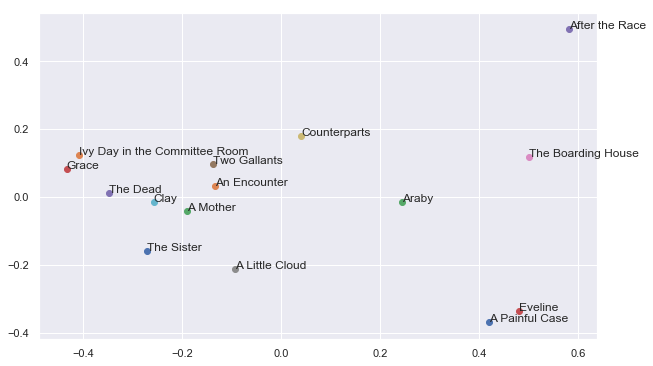

In [15]:
allDf = pd.DataFrame(TfDense, index = TextLabels, columns = WordLabels) 
pca = PCA(2)
pcaOut = pca.fit_transform(TfDense)
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(TextLabels[i], (xs[i], ys[i]))

From the plot with the first two principle components, the result made sense to me. The plot does not only show the sililarities of the words' frequencies, but shows some content information about the stories as well. Joyce had the similar frequency used of these 40 words when he describled stories that had the same theme. "Eveline" and "A Painful Case," both of these stories are about the separation of the lovers. "Two Gallants" and "An Encounter" both of these stories contain a majority of male characters. "Thd Dead" and "Clay" both of these stories have a theme about death and have a theme about Irish festivals. 

## Topics Model

In [16]:
def chunk(tokens, size): 
    return list(zip(*[tokens[i::size] for i in range(size)])) 

In [17]:
dublinersTokens = word_tokenize(dubliners.lower())
dublinersChunks = chunk(dublinersTokens, 300)
dublinersChunks = [' '.join(chunk) for chunk in dublinersChunks]
cv = CountVectorizer(min_df=2, max_df=0.95, stop_words='english')
counts = cv.fit_transform(dublinersChunks)
wordLabels = cv.get_feature_names()
lda = LatentDirichletAllocation(n_topics=5, learning_method='online')
ldaOut = lda.fit_transform(counts)

/Users/cherrycherry/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [18]:
topicLabels = []
for i, topic in enumerate(lda.components_):
    print("Topic {}".format(i))
    topicLabel = " ".join([wordLabels[i] for i in topic.argsort()[:-5 - 1:-1]])
    print(topicLabel)
    topicLabels.append(topicLabel)

Topic 0
maria joe nice donnelly children
Topic 1
said mr gabriel did man
Topic 2
alleyne farrington desk little office
Topic 3
jimmy men segouin little young
Topic 4
life little face gallaher man


I used the LatentDirichletAllocation function to find the topics of *Dubliners*. Notice that, the "topics" here is different from the meaning of a "theme". The topics model does not give information about the contents of the stories. Instead, the topics model helps to find the most frequent pattern of words that appear in the corpus. "life," "little," "face," "man," "young," "said" and "nice" were the feature words that I selected in the second part of this analysis, not surprised to see them appear in the topics model.

### Hypothesis: The sentences that contain "ireland," "irish"  and "little" have negative sentiment scores. The sentences that contain "light" have positive sentiment scores. 

### Testing Sentiment Scores

In [16]:
dublinersSentenceTokens = [sent_tokenize(text) for text in dublinersParts[1:]]

In [21]:
def findLight(sentence):
    light_list = []
    for i in sentence:
        if "light" in i:
            light_list.append(i)
    light_list_out = " ".join(light_list)
    return light_list_out

def findLittle(sentence):
    little_list = []
    for i in sentence:
        if "little" in i:
            little_list.append(i)
    little_list_out = " ".join(little_list)
    return little_list_out

def findIrish(sentence):
    sentence = [s.lower() for s in sentence] 
    irish_list = []
    for i in sentence:
        if "irish" in i:
            irish_list.append(i)
    irish_list_out = " ".join(irish_list)
    return irish_list_out

def findIreland(sentence):
    sentence = [s.lower() for s in sentence] 
    ireland_list = []
    for i in sentence:
        if "ireland" in i:
            ireland_list.append(i)
    ireland_list_out = " ".join(ireland_list)
    return ireland_list_out

In [22]:
light_sentences = [findLight(text) for text in dublinersSentenceTokens]
little_sentences = [findLittle(text) for text in dublinersSentenceTokens]
irish_sentences = [findIrish(text) for text in dublinersSentenceTokens]
ireland_sentences = [findIreland(text) for text in dublinersSentenceTokens]

In [23]:
allBlobs_light = [TextBlob(text).sentiment for text in light_sentences]
allSentiments_light = [item.polarity for item in allBlobs_light]

allBlobs_little = [TextBlob(text).sentiment for text in little_sentences]
allSentiments_little = [item.polarity for item in allBlobs_little]

allBlobs_irish = [TextBlob(text).sentiment for text in irish_sentences]
allSentiments_irish = [item.polarity for item in allBlobs_irish]

allBlobs_ireland = [TextBlob(text).sentiment for text in ireland_sentences]
allSentiments_ireland = [item.polarity for item in allBlobs_ireland]

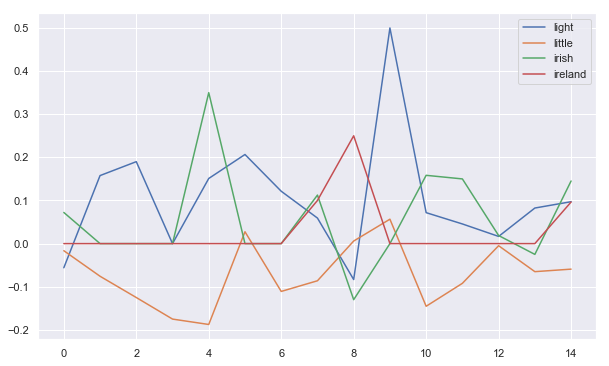

In [24]:
pd.DataFrame([allSentiments_light, allSentiments_little, allSentiments_irish, allSentiments_ireland], 
             index = ["light", "little", "irish", "ireland"]).T.plot()

At the first story and the 8th story, the sentences that contain "light" have negative sentiment scores, because the function miscalculted "lighlamb" and "lighting" as "light." These two scenarios were in the evening, which makes the computer think them count as negative mood. The sentences that contain "ireland" have positive sentiment scores in all the stories but the sentences that contain "irish" have negative sentiment scores in most of the stories but have negative sentiment scores in the 8th story and the 13th story. There is a common theme in the 8th story and the 13th story, which is about the main characters in both of the stories meet their career bottleneck. It is resonable for the sentences that contain "irish" have negative sentiment scores in this theme. The sentences that contain "little" have the negative sentiment scores as I expected. 

### Hypothesis:  "little" is more associated to female characters. 

### Testing the ratio of the sentences that contain "little" with female characters and male characters.

In [17]:
def detectFemale(text):
    female = []
    female_list = ["her", "she", "girl", "girls", "woman", "women",
                  "nannie", "eliza", "sister", "sisters", "aunt",
                  "eveline", "mother", "mrs.", "polly", "araby", 
                  "mangan", "ann", "wife", "miss", "maria", "matron",
                  "mrs.", "mary", "kathleen", "kearney", "madam",
                  "jane", "gretta"]
    text = [word_tokenize(t.lower()) for t in text]
    for i in text:
        for l in i:
            if l in female_list:
                female.append(l)
    return female


def detectMale(text):
    male = []
    male_list = ["he", "him", "boy", "boys", "man", "men", 
                 "bartell", "browne", "freddy", "gretta", "gabriel", 
                "father", "fogarty", "m'coy", "martin", "power",
                "constable", "kernan", "o'madden", "hendrick", "baritone",
                "bell", "duggan", "fitzpatrick", "kearney", "holohan",
                "lyons", "crofton", "richard", "hynes", "henchy", "o'connor",
                "jack", "sinico", "james", "joe", "matron", "tom", "weathers",
                "nosey", "paddy", "o'halloran", "callan", "alleyne", "farrington",
                "ignatius", "chandler", "doran", "lenehan", "corley", "farley",
                "routh", "jimmy", "andre", "willona", "charles", "frank", "mahony",
                "leo", "joe", "cotter"]
    text = [word_tokenize(t.lower()) for t in text]
    for i in text:
        for l in i:
            if l in male_list:
                male.append(l)
    return male

    
def detectNegative(text):
    negative = []
    negative_list = ["dack", "black", "brown"]
    text = [word_tokenize(t.lower()) for t in text]
    for i in text:
        for l in i:
            if l in negative_list:
                negative.append(l)
    return negative         

In [26]:
female_number = len(detectFemale(little_sentences))
male_number = len(detectMale(little_sentences))
total_word_number = sum([len(t.replace(punctuation, " ")) for t in little_sentences])
female_number/total_word_number, male_number/total_word_number

(0.005050227809189219, 0.008014491958061152)

In fact the male characters were more frequently along with "little," it might due to the unbalance of female and male characters in the stories. There were more chances to see the male characters in the sentences. Farther approach, checking the distance between the characters and "little" might make more sense. 

### Hypothesis: "little" is more associated with "dark," "black" or "brown" compared to "ireland," "irish," and "light."

### Testing the ratio of the sentences that contain "dark," "black" or "brown."

In [47]:
len(detectNegative(little_sentences))/len(little_sentences)

0.4

In [48]:
len(detectNegative(light_sentences))/len(light_sentences)

0.3333333333333333

In [51]:
len(detectNegative(irish_sentences))/len(irish_sentences)

0.0

In [54]:
len(detectNegative(ireland_sentences))/len(ireland_sentences)

0.0

The results supported my hypothesis. The sentences that contain "little" are more likely to appear "dark," "black" and "brown." Thus, "dark," "black," and "brown" might help to contribute the negative sentiment scores of the sentences that contain "little." 

## Conclusion

James Joyce had a constant writing style while he was creating *Dubliners*. The Parts of Speech distributions in all stories are roughly identical in *Dubliners*. He preferred using noun and verb compared to using adjective vocabularies in *Dubliners*. Using 40 selected feature words helps to develope a PCA plot that gives the content information about the stories. The sentences that contain "ireland," "irish" and "light" have the majority of positive sentiment scores through the book, but the sentences that contain "little" have the majority of negative sentiment scores through the book. The association between "little" and female characters need farther consideration. "little" is more associated with "dark," "black" or "brown" compared to "ireland," "irish," and "light."

### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [20]:
filename = 'Zhuoyi-Zou-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('Zhuoyi-Zou-Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1281
